In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm

In [2]:
def ROCmodf (P,T,num):
    mini = np.amin(P)
    maxi = np.amax(P)
    inc = (maxi-mini)/num
    n = np.size(P,0)
    m = np.size(P,1)
    TPR = np.zeros(num+2) # change accordingly with inc
    FPR = np.zeros(num+2)
    i = 0
    #print(n)
    for tet in np.arange(mini,maxi+inc,inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            #print(cls)
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        TPR[i] = TP/(TP + FN)
        FPR[i] = FP/(FP + TN)   
        i = i + 1
    plt.plot(FPR,TPR)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    
def DETmodf (P,T,num):
    dnorm = lambda t:(norm.ppf(t))
    mini = np.amin(P)
    maxi = np.amax(P)
    inc = (maxi-mini)/num
    n = np.size(P,0)
    m = np.size(P,1)
    FPR = np.zeros(num+2) # change accordingly with inc
    FNR = np.zeros(num+2)
    i = 0
    #print(inc)
    for tet in np.arange(mini,maxi+inc,inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        FNR[i] = FN/(TP + FN)
        FPR[i] = FP/(FP + TN)     
        i = i + 1
    FPR1 = (np.array([dnorm(xi) for xi in FPR]))
    FNR1 = (np.array([dnorm(xi) for xi in FNR]))
    #print(FPR1)
    #print(FNR1)
#     detection_error_tradeoff(FPR1,FNR1)
    plt.plot(FPR1,FNR1)
    plt.show()
    
def func2(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap="cool"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes =["1","2","3","4","5"] 
    # classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(# ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), fontsize=18 ,
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [3]:
data = np.loadtxt("train.txt",delimiter=",")
# data = pd.DataFrame(data)
X_train = data[:,[0,1]]
Y_train = data[:,2]

In [4]:
data2 = np.loadtxt("dev.txt",delimiter=",")
X_test = data2[:,[0,1]]
Y_test = data2[:,2]

In [5]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

C:\Users\Sai Bharadwaj Avvari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
Y_pred = LR.predict(X_test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[309 191]
 [187 313]]
              precision    recall  f1-score   support

         1.0       0.62      0.62      0.62       500
         2.0       0.62      0.63      0.62       500

    accuracy                           0.62      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.62      0.62      0.62      1000



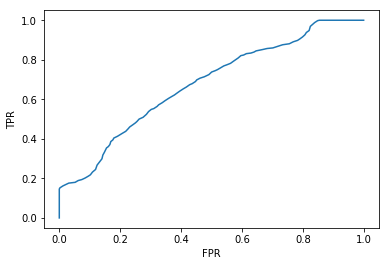

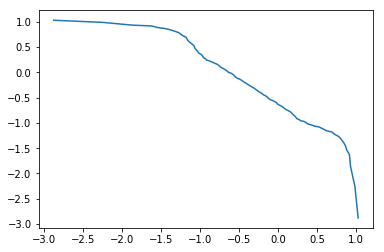

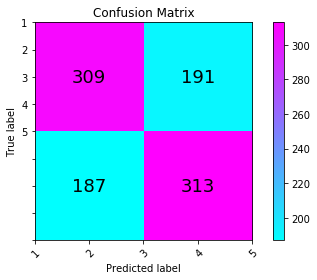

In [8]:
Predicted = LR.predict(X_test)

prob = LR.predict_proba(X_test)

T=np.full(500,0,dtype='int')
T = np.concatenate((T,np.full(500,1,dtype='int')))\

# print(T)

#func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix, without x y ')

ROCmodf(prob,T,100)

DETmodf(prob,T,100)

func2(Y_test,Y_pred,classes=["1","2","3"],title="Confusion Matrix")

In [9]:
import glob
trainfiles = glob.glob('./hand_written/*/train/*.txt',recursive=True)
devfiles = glob.glob('./hand_written/*/dev/*.txt',recursive=True)
distance = lambda x,y: np.linalg.norm(x-y)

In [10]:
def redundancy(files,res_dim):
    train = []
    traincounts = []
    for e in files:
        a = np.loadtxt(e)
        a1 = np.reshape(a[1:],(-1,2))
        a1[:,0] = (a1[:,0]-a1[:,0].min())/(a1[:,0].max()-(a1[:,0].min()))
        a1[:,1] = (a1[:,1]-a1[:,1].min())/(a1[:,1].max()-(a1[:,1].min()))
        curr = int(a[0])
        x,y =[],[]
        for i in range(int(curr)):
            x +=[a1[:,0][i]]*(res_dim//curr + int(res_dim%curr>i))
            y +=[a1[:,1][i]]*(res_dim//curr + int(res_dim%curr>i))
        train+=[np.reshape([[i,j] for i,j in zip(x,y)],(1,-1))[0]]
        traincounts+=[a[0]]
    return train,traincounts

In [11]:
X,_ = redundancy(trainfiles,178)
devX,_ = redundancy(devfiles,178)
X = np.array(X)
devX= np.array(devX)

In [12]:
mapping = {}
mapping['chA'] = 2
mapping['a'] = 0
mapping['bA'] = 1
mapping['lA'] = 3
mapping['tA'] = 4
labels=[]
for i in trainfiles:
#     print((i.split('\\')[1]))
    labels.append(mapping[i.split('\\')[1]])
# labels = [mapping[(i.split('\\')[2])] for i in trainfiles]
# labels

In [13]:
# dev_y = [mapping[(i.split('\\')[2])] for i in devfiles]
dev_y = []
for i in devfiles:
#     print((i.split('\\')[1]))
    dev_y.append(mapping[i.split('\\')[1]])

In [14]:
LR2 = LogisticRegression()
LR2.fit(X, labels)
Y_pred2 = LR2.predict(devX)

C:\Users\Sai Bharadwaj Avvari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sai Bharadwaj Avvari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(dev_y,Y_pred2))
print(classification_report(dev_y,Y_pred2))

[[20  0  0  0  0]
 [ 0 19  1  0  0]
 [ 0  1 19  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



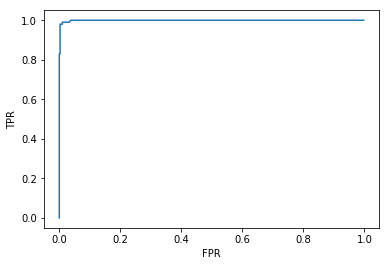

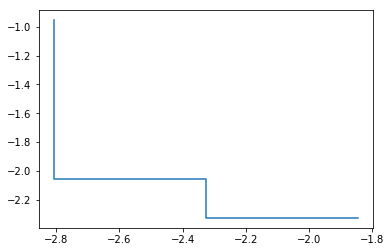

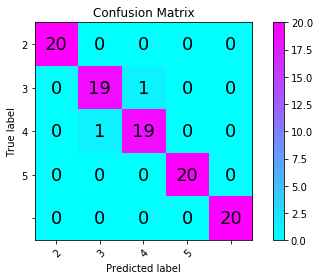

In [16]:
# Predicted = svclassifier.predict(X_test)

prob = LR2.predict_proba(devX)
# print(prob)
T = np.full(20,0,dtype='int')
T = np.concatenate((T,np.full(20,1,dtype='int')))
T = np.concatenate((T,np.full(20,2,dtype='int')))
T = np.concatenate((T,np.full(20,3,dtype='int')))
T = np.concatenate((T,np.full(20,4,dtype='int')))

# print(T)

#func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix, without x y ')
# print(prob)
ROCmodf(prob,T,100)

DETmodf(prob,T,100)

func2(dev_y,Y_pred2,classes=["1","2","3"],title="Confusion Matrix")

In [17]:
import glob
trainfiles = glob.glob('./speech/*/train/*.mfcc',recursive=True)
devfiles = glob.glob('./speech/*/dev/*.mfcc',recursive=True)
distance = lambda x,y: np.linalg.norm(x-y)

In [18]:
def redundancy_voice(files,res_dim):
    train = []
    traincounts = []
    for e in files:
        a = np.loadtxt(e,skiprows=1)
        curr = int(a.shape[0])
        res = []
        for i in range(int(curr)):
            res += list(np.tile(a[i],(res_dim//curr + int(res_dim%curr>i))))
        train+=[np.array(res)]
        traincounts+=[curr]
    return train,traincounts

In [19]:
X,_ = redundancy_voice(trainfiles,194)
devX,_ = redundancy_voice(devfiles,194)
X = np.array(X)
devX = np.array(devX)

In [20]:
mapping = {}
mapping['1'] = 0
mapping['2'] = 1
mapping['5'] = 2
mapping['9'] = 3
mapping['z'] = 4
labels = []
for i in trainfiles:
    labels.append(mapping[(i.split('\\')[1])])

In [21]:
dev_y = [mapping[(i.split('\\')[1])] for i in devfiles]

In [22]:
LR3 = LogisticRegression()
LR3.fit(X, labels)
Y_pred3 = LR3.predict(devX)

C:\Users\Sai Bharadwaj Avvari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sai Bharadwaj Avvari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(dev_y,Y_pred3))
print(classification_report(dev_y,Y_pred3))

[[12  0  0  0  0]
 [ 0 12  0  0  0]
 [ 1  0 10  0  1]
 [ 2  1  1  8  0]
 [ 0  2  0  0 10]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       0.80      1.00      0.89        12
           2       0.91      0.83      0.87        12
           3       1.00      0.67      0.80        12
           4       0.91      0.83      0.87        12

    accuracy                           0.87        60
   macro avg       0.88      0.87      0.86        60
weighted avg       0.88      0.87      0.86        60



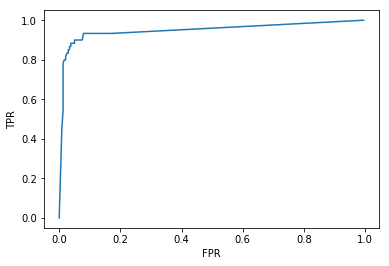

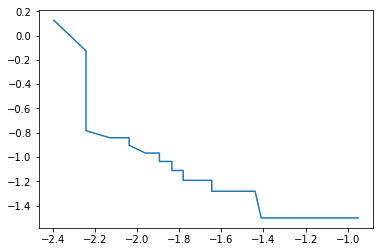

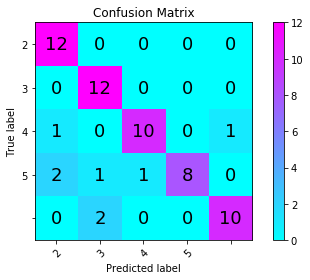

In [24]:
# Predicted = svclassifier.predict(X_test)

prob = LR3.predict_proba(devX)
# print(prob)
T = np.full(12,0,dtype='int')
T = np.concatenate((T,np.full(12,1,dtype='int')))
T = np.concatenate((T,np.full(12,2,dtype='int')))
T = np.concatenate((T,np.full(12,3,dtype='int')))
T = np.concatenate((T,np.full(12,4,dtype='int')))

# print(T)

#func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix, without x y ')
# print(prob)
ROCmodf(prob,T,100)

DETmodf(prob,T,100)

func2(dev_y,Y_pred3,classes=["1","2","3"],title="Confusion Matrix")

In [25]:
import glob
trainfiles = glob.glob('./image/*/train/*.jpg_color_edh_entropy',recursive=True)
devfiles = glob.glob('./image/*/dev/*.jpg_color_edh_entropy',recursive=True)

In [26]:
def load_data(files):
    data =[]
    for i in files:
        data+=[np.reshape(np.loadtxt(i),(-1))]
    return np.array(data)

In [27]:
X = load_data(trainfiles)
devX = load_data(devfiles)

In [28]:
mapping = {}
mapping['mountain'] = 2
mapping['forest'] = 0
mapping['opencountry'] = 3
mapping['insidecity'] = 1
mapping['street'] = 4
labels = [mapping[(i.split('\\')[1])] for i in trainfiles]
label_one_hot = np.eye(5)[labels]
dev_y = [mapping[(i.split('\\')[1])] for i in devfiles]

In [29]:
LR4 = LogisticRegression()
LR4.fit(X, labels)
Y_pred4 = LR4.predict(devX)

C:\Users\Sai Bharadwaj Avvari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sai Bharadwaj Avvari\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(dev_y,Y_pred4))
print(classification_report(dev_y,Y_pred4))

[[49  5  5  4  3]
 [ 5 34  8  5 10]
 [ 7  4 41 18  5]
 [ 7  7 22 43  3]
 [ 8  7  5  1 37]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.69        66
           1       0.60      0.55      0.57        62
           2       0.51      0.55      0.53        75
           3       0.61      0.52      0.56        82
           4       0.64      0.64      0.64        58

    accuracy                           0.59       343
   macro avg       0.60      0.60      0.60       343
weighted avg       0.60      0.59      0.59       343



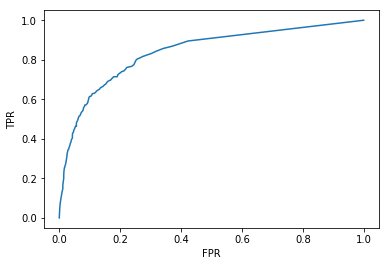

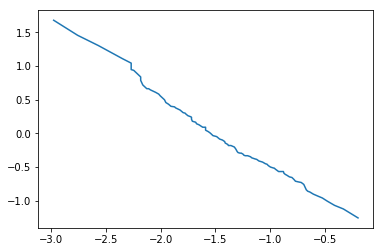

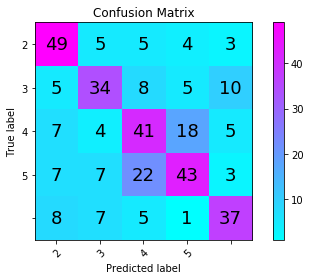

In [31]:
# Predicted = svclassifier.predict(X_test)

prob = LR4.predict_proba(devX)
# print(prob)
T = np.full(66,0,dtype='int')
T = np.concatenate((T,np.full(62,1,dtype='int')))
T = np.concatenate((T,np.full(75,2,dtype='int')))
T = np.concatenate((T,np.full(82,3,dtype='int')))
T = np.concatenate((T,np.full(58,4,dtype='int')))

# print(T)

#func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix, without x y ')
# print(prob)
ROCmodf(prob,T,100)

DETmodf(prob,T,100)

func2(dev_y,Y_pred4,classes=["1","2","3"],title="Confusion Matrix")